
SNOMIC Code Mapping (Code: Display):
10331-7: RH FACTOR
10378-8: POLYCHROMASIA:ACNC:PT:BLD:ORD:MICROSCOPY.LIGHT
10839-9: TROPONIN I.CARDIAC:MCNC:PT:SER/PLAS:QN:
10900-9: HEPATITIS B VIRUS SURFACE AB:ACNC:PT:SER:ORD:EIA
11011-4: Quantitative serum or plasma hepatitis C virus RNA assay by real-time PCR (units/volume)
11125-2: PLATELETS:MORPH:PT:BLD:NOM:
11268-0: CULTURE THROAT GRP A STREP ONLY
11277-1:  EPITH CELLS
11367-0: History of tobacco use
11579-0: THYROTROPIN:ACNC:PT:SER/PLAS:QN:DETECTION LIMIT = 0.01 MU/L
12183-0: CHOLESTEROL:MCNC:PT:BODY FLD:QN:
12209-3: EOSINOPHILS/100 LEUKOCYTES:NFR:PT:BODY FLD:QN:MANUAL COUNT
12230-9: MACROPHAGES/100 LEUKOCYTES:NFR:PT:BODY FLD:QN:MANUAL COUNT
12234-1: MESOTHELIAL CELLS/100 LEUKOCYTES:NFR:PT:BODY FLD:QN:MANUAL COUNT
12235-8: Urine sediment microscopic examination by light microscopy (nominal result)
12238-2: NEUTROPHILS/100 LEUKOCYTES:NFR:PT:BODY FLD:QN:MANUAL COUNT
12286-1: DRUG SCREEN BCMH 12 NO CONFIRM
13452-8: IRON/TRANSFERRIN:MCRTO:PT:S

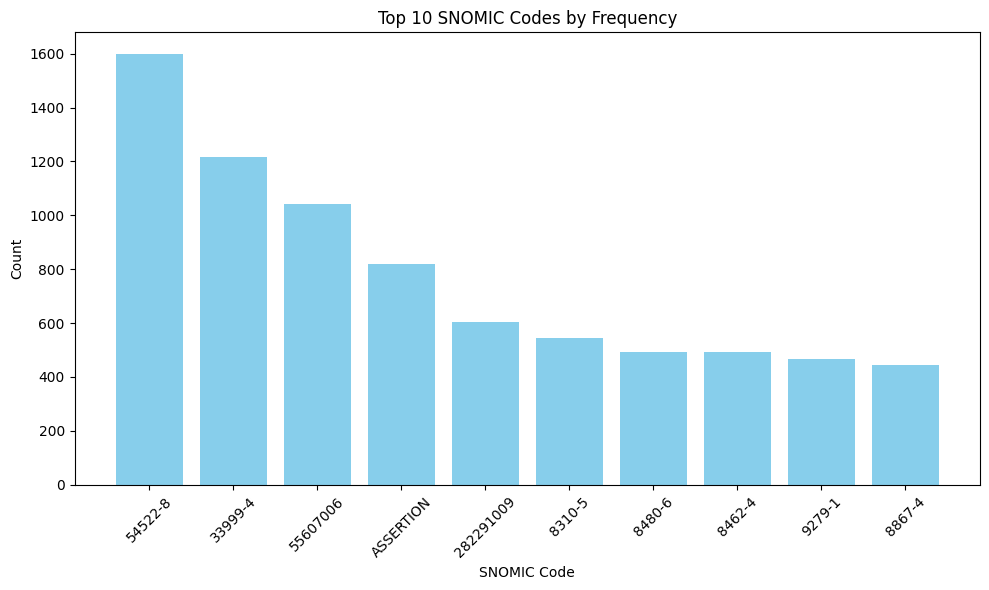


Sample aggregated codes per patient:
Patient ID: 104 has 60 unique codes.
Patient ID: 48 has 19 unique codes.
Patient ID: 000000041 has 82 unique codes.
Patient ID: 142 has 5 unique codes.
Patient ID: 211 has 115 unique codes.


In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# directory path where all the CCDA JSON files (in 83 patient folders) are stored.
directory = "/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name"

# Initialize containers:
unique_codes = set()            # To store all unique SNOMIC codes
code_counts = {}                # To count the number of occurrences of each code
patient_codes = {}              # Mapping of each patient ID to a set of codes found in that patient’s files
code_to_display = {}            # Mapping from code value to display text (i.e. readable key)

# Walk through the directory and process each JSON file.
for root, _, files in os.walk(directory):
    for file in files:
        if file.lower().endswith('.json'):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            # Looks for the Patient resourceType in the Bundle to extract patient id.
            patient_id = None
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Patient":
                    patient_id = resource.get("id", "Unknown")
                    break

            if patient_id is None:
                continue  # Skip file if no patient info is found.

            # Create an entry for the patient if not already present.
            if patient_id not in patient_codes:
                patient_codes[patient_id] = set()

            # Loop through all entries and extract codes from the "code" field
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if "code" in resource and "coding" in resource["code"]:
                    for coding in resource["code"]["coding"]:
                        code_val = coding.get("code")
                        if code_val:
                            unique_codes.add(code_val)
                            # Increment frequency count for the code.
                            code_counts[code_val] = code_counts.get(code_val, 0) + 1
                            # Add the code to the current patient's set.
                            patient_codes[patient_id].add(code_val)
                            
                            # Capture the human-readable display value if available.
                            display_value = coding.get("display")
                            if display_value: 
                                # If already stored and is different, you can choose to log this or update based on your business logic.
                                if code_val not in code_to_display:
                                    code_to_display[code_val] = display_value
                                # Otherwise, you might check for consistency:
                                elif code_to_display[code_val] != display_value:
                                    # Optionally, log a warning if the same code appears with different display values.
                                    print(f"Warning: Code {code_val} has multiple displays: '{code_to_display[code_val]}' and '{display_value}'")
                                    # Here we choose the first encountered display.
                                    

# Display the mapping between SNOMIC codes and their display values.
print("\nSNOMIC Code Mapping (Code: Display):")
for code in sorted(code_to_display.keys()):
    print(f"{code}: {code_to_display[code]}")

# OPTIONAL: Create a DataFrame for code frequency distribution.
df_codes = pd.DataFrame(list(code_counts.items()), columns=["SNOMIC Code", "Count"])
df_codes = df_codes.sort_values(by="Count", ascending=False)
print("\nTop 10 SNOMIC Codes by Frequency:")
print(df_codes.head(10))

# OPTIONAL: Visualize the top 10 codes.
plt.figure(figsize=(10, 6))
plt.bar(df_codes["SNOMIC Code"].head(10), df_codes["Count"].head(10), color='skyblue')
plt.xlabel("SNOMIC Code")
plt.ylabel("Count")
plt.title("Top 10 SNOMIC Codes by Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# OPTIONAL: Print a sample of how many unique codes have been aggregated per patient.
print("\nSample aggregated codes per patient:")
for patient, codes in list(patient_codes.items())[:5]:
    print(f"Patient ID: {patient} has {len(codes)} unique codes.")




In [2]:
import csv
import os

# Define the output CSV path (change if needed)
output_csv_path = os.path.join(directory, "loinc_code_display_mapping.csv")

# Write the code-to-display mappings to a CSV file
with open(output_csv_path, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["LOINC Code", "Display Value"])
    
    for code in sorted(code_to_display.keys()):
        writer.writerow([code, code_to_display[code]])

print(f"\nLOINC code-to-display mapping saved to:\n{output_csv_path}")





✅ LOINC code-to-display mapping saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/loinc_code_display_mapping.csv


In [4]:
import csv
import os

# Path where you want to save the output CSV
output_csv_path = os.path.join(directory, "patient_code_counts.csv")

# Write patient ID and number of unique codes to CSV
with open(output_csv_path, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Patient ID", "Unique Code Count"])
    
    for patient_id, codes in patient_codes.items():
        writer.writerow([patient_id, len(codes)])

print(f"\n Patient code count summary saved to:\n{output_csv_path}")






✅ Patient code count summary saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/patient_code_counts.csv


In [3]:
import csv
import os

# Define the output CSV path (change if needed)
output_csv_path = os.path.join(directory, "\naggregated codes per patient:.csv")

# Write the code-to-display mappings to a CSV file
with open(output_csv_path, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["LOINC Code", "Display Value"])
    
    for patient, codes in list(patient_codes.items())[:5]:
        writer.writerow([code, code_to_display[code]])

print(f"\n Sample aggregated codes per patient saved to:\n{output_csv_path}")


 Sample aggregated codes per patient saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/
aggregated codes per patient:.csv


In [5]:
import csv
import os

# Path to save the output
output_csv_path = os.path.join(directory, "patient_code_counts_with_names.csv")

# Helper: patient ID → name mapping (build this from files)
patient_id_to_name = {}

# Re-scan to gather patient names if not already done
for root, _, files in os.walk(directory):
    for file in files:
        if file.lower().endswith('.json'):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Patient":
                    pid = resource.get("id")
                    name_data = resource.get("name", [])
                    if name_data:
                        full_name = f"{name_data[0].get('given', [''])[0]} {name_data[0].get('family', '')}"
                        patient_id_to_name[pid] = full_name

# Write final CSV
with open(output_csv_path, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Patient ID", "Patient Name", "Unique Code Count"])

    for patient_id, codes in patient_codes.items():
        name = patient_id_to_name.get(patient_id, "Unknown")
        writer.writerow([patient_id, name, len(codes)])

print(f"\nPatient code count (with names) saved to:\n{output_csv_path}")





Patient code count (with names) saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/patient_code_counts_with_names.csv


In [8]:
import os
import json
import csv

# Set your patient data folder path here
directory = "/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name"

# Output file
output_csv_path = os.path.join(directory, "patient_observations.csv")

# Prepare rows
observation_rows = []

for root, _, files in os.walk(directory):
    for file in files:
        if file.lower().endswith('.json'):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            patient_id = None
            patient_name = "Unknown"

            # Get patient info
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Patient":
                    patient_id = resource.get("id", "Unknown")
                    name_data = resource.get("name", [])
                    if name_data:
                        given = name_data[0].get("given", [""])[0]
                        family = name_data[0].get("family", "")
                        patient_name = f"{given} {family}"
                    break

            if not patient_id:
                continue

            # Extract observations
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Observation":
                    coding_list = resource.get("code", {}).get("coding", [])
                    for coding in coding_list:
                        loinc = coding.get("code")
                        display = coding.get("display", "Unknown")

                        value_obj = resource.get("valueQuantity")
                        if value_obj:
                            value = value_obj.get("value")
                            unit = value_obj.get("unit", "")
                            time = resource.get("effectiveDateTime", "")
                            observation_rows.append([
                                patient_id, patient_name, loinc, display, value, unit, time
                            ])

# Write to CSV
with open(output_csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Patient ID", "Patient Name", "LOINC Code", "Display Name", "Value", "Unit", "DateTime"])
    writer.writerows(observation_rows)

print(f"\n All patient observations saved to:\n{output_csv_path}")





 All patient observations saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/patient_observations.csv


#### This is the file named Patients_observations_1 which is preprocessed and helps further used by the other data code to generate the Cleaned FHIR CCDA files.

In [9]:
import os
import json
import csv

# === CONFIGURE YOUR PATHS ===
data_directory = "/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name"
loinc_mapping_file = "/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/loinc_code_display_mapping.csv"
output_csv_path = os.path.join(data_directory, "patient_observations.csv")

# === LOAD LOINC MAPPING ===
loinc_display_map = {}
with open(loinc_mapping_file, newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        loinc_display_map[row['LOINC Code']] = row['Display Value']

# === COLLECT OBSERVATION ROWS ===
observation_rows = []

for root, _, files in os.walk(data_directory):
    for file in files:
        if file.lower().endswith('.json'):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            patient_id = None
            patient_name = "Unknown"

            # Extract patient name and ID
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Patient":
                    patient_id = resource.get("id", "Unknown")
                    name_info = resource.get("name", [])
                    if name_info:
                        given = name_info[0].get("given", [""])[0]
                        family = name_info[0].get("family", "")
                        patient_name = f"{given} {family}"
                    break

            if not patient_id:
                continue

            # Extract observations
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Observation":
                    coding_list = resource.get("code", {}).get("coding", [])
                    for coding in coding_list:
                        loinc_code = coding.get("code")
                        if not loinc_code:
                            continue
                        # Get the display name from uploaded CSV mapping
                        display = loinc_display_map.get(loinc_code, coding.get("display", "Unknown"))

                        value_data = resource.get("valueQuantity")
                        if value_data:
                            value = value_data.get("value")
                            unit = value_data.get("unit", "")
                            time = resource.get("effectiveDateTime", "")
                            observation_rows.append([
                                patient_id, patient_name, loinc_code, display, value, unit, time
                            ])

# === WRITE FINAL CSV ===
with open(output_csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Patient ID", "Patient Name", "LOINC Code", "Display Name", "Value", "Unit", "DateTime"])
    writer.writerows(observation_rows)

print(f"\n All patient observations saved to:\n{output_csv_path}")





✅ All patient observations saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/patient_observations.csv


In [10]:
import os
import json
import csv

# === CONFIGURATION ===
data_directory = "/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name"
loinc_mapping_file = "/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/loinc_code_display_mapping.csv"
output_csv_path = os.path.join(data_directory, "CCDA_observations.csv")

# === LOAD LOINC MAPPING ===
loinc_display_map = {}
with open(loinc_mapping_file, newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        loinc_display_map[row['LOINC Code']] = row['Display Value']

# === COLLECT OBSERVATION ROWS ===
observation_rows = []

for root, _, files in os.walk(data_directory):
    for file in files:
        if file.lower().endswith('.json'):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            patient_id = None
            patient_name = "Unknown"

            # Extract patient info
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Patient":
                    patient_id = resource.get("id", "Unknown")
                    name_info = resource.get("name", [])
                    if name_info:
                        given = name_info[0].get("given", ["Unknown"])[0]
                        family = name_info[0].get("family", "Unknown")
                        patient_name = f"{given} {family}"
                    break

            if not patient_id:
                continue

            # Extract observations
            for entry in data.get("entry", []):
                resource = entry.get("resource", {})
                if resource.get("resourceType") == "Observation":
                    coding_list = resource.get("code", {}).get("coding", [])
                    for coding in coding_list:
                        loinc_code = coding.get("code", "Unknown")
                        display = loinc_display_map.get(loinc_code, coding.get("display", "Unknown"))

                        # Default value and unit
                        value = "Unknown"
                        unit = "Unknown"

                        # Extract value from all possible FHIR types
                        if "valueQuantity" in resource:
                            val = resource["valueQuantity"]
                            value = val.get("value", "Unknown")
                            unit = val.get("unit", "Unknown")

                        elif "valueString" in resource:
                            value = resource["valueString"]

                        elif "valueCodeableConcept" in resource:
                            concept = resource["valueCodeableConcept"]
                            value = concept.get("text")
                            if not value:
                                codings = concept.get("coding", [])
                                if codings:
                                    value = codings[0].get("display", "Unknown")

                        elif "valueBoolean" in resource:
                            value = str(resource["valueBoolean"])

                        elif "valueInteger" in resource:
                            value = str(resource["valueInteger"])

                        time = resource.get("effectiveDateTime", "Unknown")

                        observation_rows.append([
                            patient_id,
                            patient_name,
                            loinc_code,
                            display,
                            value,
                            unit,
                            time
                        ])

# === WRITE FINAL CSV ===
with open(output_csv_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Patient ID", "Patient Name", "LOINC Code", "Display Name", "Value", "Unit", "DateTime"])
    writer.writerows(observation_rows)

print(f"\n All observations saved to:\n{output_csv_path}")





 All observations saved to:
/home/user/Desktop/LLM_UA_Test Files/LLM_UA_Test Files/Structured Data/CCDA/Converted by name/CCDA_observations.csv
